# Práctica 1

Conociendo los datos con los que vamos a trabajar.
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.

febrero de 2023


In [ ]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [ ]:
#Cual es el tipo de los atributos?
data. dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hpw                int64
Country           object
C                 object
dtype: object

**Separar en variables categoricas y numericas**



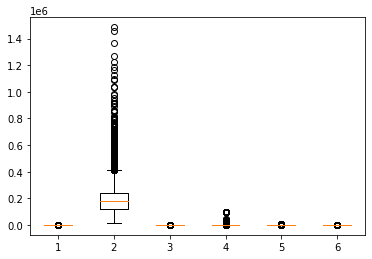

In [ ]:
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()


In [ ]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


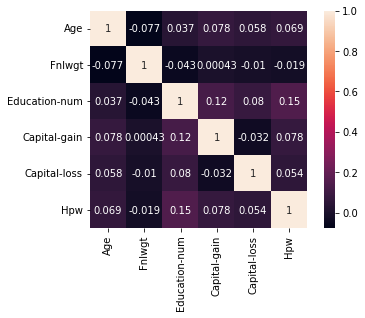

In [ ]:
sns.heatmap(data.corr(), square=True, annot=True)

In [ ]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

3

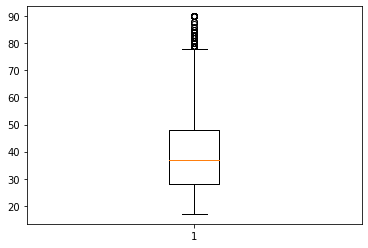

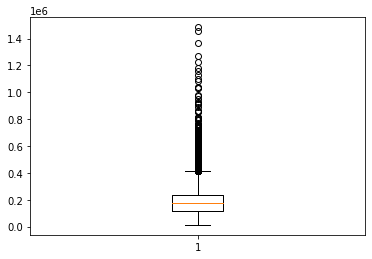

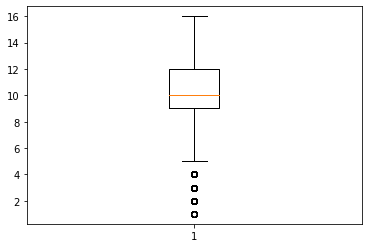

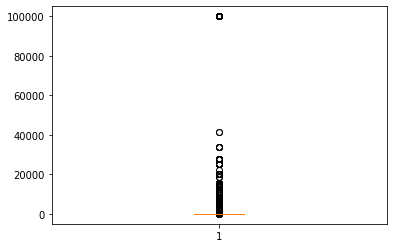

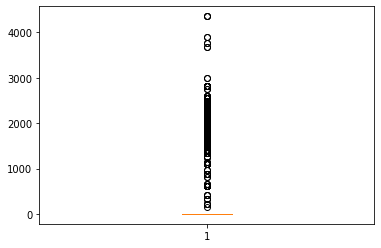

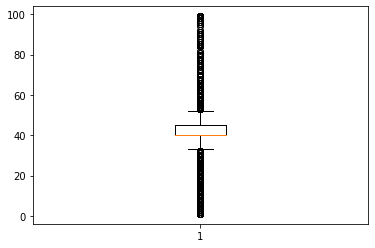

In [ ]:
#En qué atributos hay datos atípicos?
plt.boxplot(data['Age'])
plt.show()
plt.boxplot(data['Fnlwgt'])
plt.show()
plt.boxplot(data['Education-num'])
plt.show()
plt.boxplot(data['Capital-gain'])
plt.show()
plt.boxplot(data['Capital-loss'])
plt.show()
plt.boxplot(data['Hpw'])
plt.show()


# Datos atipicos

In [ ]:
def porcentaje(lista):
  count = 0
  for i in range(len(lista)):
    if(lista[i] < -3 or lista[i] > 3):
      count += 1
  res = (count / len(lista)) * 100
  return res 
  
def zscore(lista):
  return np.abs(stats.zscore(lista)) 

z1 = np.abs(stats.zscore(data['Age'])) 
print('porcentaje de valores atipicos en Age', porcentaje(z1))

z2 = np.abs(stats.zscore(data['Fnlwgt']))
print('porcentaje de valores atipicos en Fnlwgt', porcentaje(z2))


z3 = np.abs(stats.zscore(data['Education-num']))
print('porcentaje de valores atipicos en Education-num', porcentaje(z3))

z4 = np.abs(stats.zscore(data['Capital-gain']))
print('porcentaje de valores atipicos en Capital-gain', porcentaje(z4))

z5 = np.abs(stats.zscore(data['Capital-loss']))
print('porcentaje de valores atipicos en Capital-loss', porcentaje(z5))

z6 = np.abs(stats.zscore(data['Hpw'])) 
print('porcentaje de valores atipicos en Hpw', porcentaje(z6))



porcentaje de valores atipicos en Age 0.371610208531679
porcentaje de valores atipicos en Fnlwgt 1.0656920856239058
porcentaje de valores atipicos en Education-num 0.672583765854857
porcentaje de valores atipicos en Capital-gain 0.6602991308620743
porcentaje de valores atipicos en Capital-loss 4.514603359847671
porcentaje de valores atipicos en Hpw 1.3513098492061055


In [ ]:
#Age
data = data[(np.abs(stats.zscore(data['Age'])) < 3)]

In [ ]:
#Fnlwgt
data = data[(np.abs(stats.zscore(data['Fnlwgt'])) < 3)]

In [ ]:
#Education-num
data = data[(np.abs(stats.zscore(data['Age'])) < 3)]

In [ ]:
#Capital-gain
data = data[(np.abs(stats.zscore(data['Education-num'])) < 3)]

In [ ]:
#Capital-loss
data = data[(np.abs(stats.zscore(data['Capital-loss'])) < 3)]

In [ ]:
#Hpw
data = data[(np.abs(stats.zscore(data['Hpw'])) < 3)]

In [ ]:
#porcentaje datos nulos en variables
(data.isnull().sum()/data.shape[0])*100

Age               0.000000
Workclass         5.517425
Fnlwgt            0.000000
Education         0.000000
Education-num     0.000000
Marital-status    0.000000
Occupation        5.540748
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital-gain      0.000000
Capital-loss      0.000000
Hpw               0.000000
Country           1.742520
C                 0.000000
dtype: float64

In [ ]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Age                  0
Workclass         1656
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1663
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hpw                  0
Country            523
C                    0
dtype: int64

# reemplazar datos nulos por la media y moda

In [ ]:
#reemplazar datos nulos en numericos por la media y en categoricos por la moda
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Workclass'].fillna(data['Workclass'].value_counts().index[0], inplace=True)
data['Fnlwgt'].fillna(data['Fnlwgt'].median(), inplace=True)
data['Education'].fillna(data['Education'].value_counts().index[0], inplace=True)
data['Education-num'].fillna(data['Education-num'].median(), inplace=True)
data['Marital-status'].fillna(data['Marital-status'].value_counts().index[0], inplace=True)
data['Occupation'].fillna(data['Occupation'].value_counts().index[0], inplace=True)
data['Relationship'].fillna(data['Relationship'].value_counts().index[0], inplace=True)
data['Race'].fillna(data['Race'].value_counts().index[0], inplace=True)
data['Capital-gain'].fillna(data['Capital-gain'].median(), inplace=True)
data['Capital-loss'].fillna(data['Capital-loss'].median(), inplace=True)
data['Hpw'].fillna(data['Hpw'].median(), inplace=True)
data['Country'].fillna(data['Country'].value_counts().index[0], inplace=True)

In [ ]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
print(data['C'].value_counts()) 

 <=50K    23167
 >50K      6847
Name: C, dtype: int64


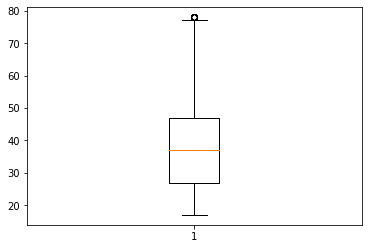

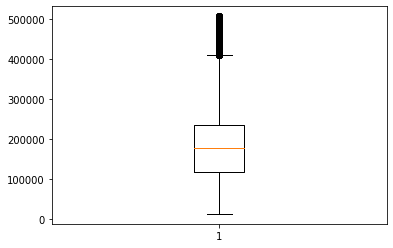

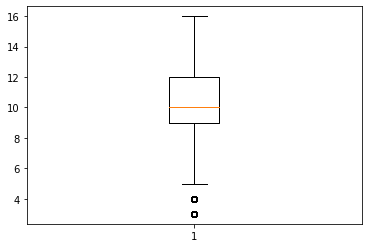

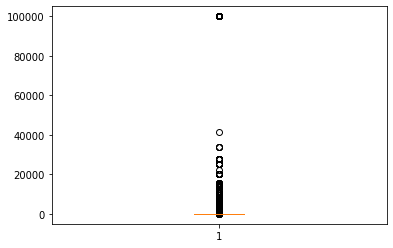

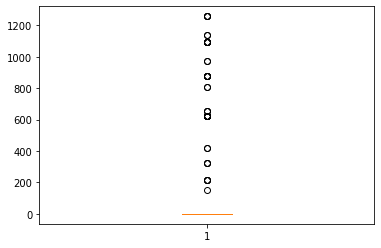

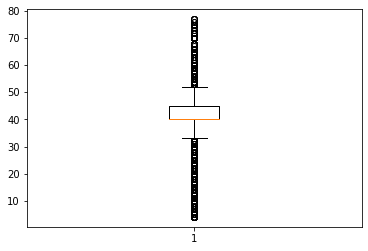

In [ ]:
#Diferencias?
plt.boxplot(data['Age'])
plt.show()
plt.boxplot(data['Fnlwgt'])
plt.show()
plt.boxplot(data['Education-num'])
plt.show()
plt.boxplot(data['Capital-gain'])
plt.show()
plt.boxplot(data['Capital-loss'])
plt.show()
plt.boxplot(data['Hpw'])
plt.show()

In [ ]:
lista_numericos = [] #datos numericos
lista_categoricos = [data["Workclass"], data["Education"], data["Marital-status"], data["Occupation"], data["Relationship"], data["Race"], data["Sex"], data["Country"]] #categoricos ya codificados, encoder a los de tipo object
#print(lista_categoricos)
lista_fact = []
for e in lista_categoricos:
  aux, _ = pd.factorize(e)
  lista_fact.append(aux)
print(lista_fact)

[array([0, 1, 2, ..., 2, 2, 5]), array([0, 0, 1, ..., 1, 1, 1]), array([0, 1, 2, ..., 5, 0, 1]), array([0, 1, 2, ..., 0, 0, 1]), array([0, 1, 0, ..., 4, 3, 2]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 1, 0, 1]), array([0, 0, 0, ..., 0, 0, 0])]


# F1 con K-folds paramteros por defualt

In [ ]:
data["Workclass"] = lista_fact[0]
data["Education"] = lista_fact[1]
data["Marital-status"] = lista_fact[2]
data["Occupation"] = lista_fact[3]
data["Relationship"] = lista_fact[4]
data["Race"] = lista_fact[5]
data["Sex"] = lista_fact[6]
data["Country"] = lista_fact[7]

In [ ]:
print(data)

       Age  Workclass  Fnlwgt  Education  Education-num  Marital-status  \
0       39          0   77516          0             13               0   
1       50          1   83311          0             13               1   
2       38          2  215646          1              9               2   
3       53          2  234721          2              7               1   
4       28          2  338409          0             13               1   
...    ...        ...     ...        ...            ...             ...   
32556   27          2  257302          5             12               1   
32557   40          2  154374          1              9               1   
32558   58          2  151910          1              9               5   
32559   22          2  201490          1              9               0   
32560   52          5  287927          1              9               1   

       Occupation  Relationship  Race  Sex  Capital-gain  Capital-loss  Hpw  \
0               0   

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

labelencoder= LabelEncoder() 
X = np.array(data.drop(['C'],1))
y = np.array(labelencoder.fit_transform(data['C']))



<ipython-input-71-48377991c17c>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['C'],1))


In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X,y)

0.8107549810088626

In [ ]:
validation_size = 0.30
seed = 123
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)

(21009, 15) (21009,)
(9005, 15) (9005,)


In [ ]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
modelo = linear_model.LogisticRegression()
puntuacion = cross_val_score(modelo, X, y, scoring = 'f1', cv=cv, n_jobs=-1)

In [ ]:
print(puntuacion)

[0.3714927  0.33257403 0.35824301 0.33176471 0.37306843]


# F1 con balanceo y K-folds